<a href="https://colab.research.google.com/github/Thanawich-Pinprayoon/Dog-and-Cat-Lab-test-to-medicine-recommendation/blob/master/Predict_use_this_medicine%3F_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
medicine = 'Marbofloxacin' #upper case (use to name the model)
medicine2 = 'marbofloxacin'

#import lib

In [118]:
import os 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

#import file

In [0]:
indata = pd.read_csv('/content/drive/My Drive/ThaiWordcutTest/Input CSV/2018_12/01combined2018_12.csv')

In [0]:
outdata = pd.read_csv('/content/drive/My Drive/ThaiWordcutTest/OutputCSV/GP/out_2018_12_GP.csv')

In [0]:
traininput = pd.read_csv('/content/drive/My Drive/ThaiWordcutTest/Input CSV/11month_data_in.csv')

In [0]:
trainAnswerFile = pd.read_csv('/content/drive/My Drive/ThaiWordcutTest/OutputCSV/GP/trainAnswer_GP_12month.csv')

#get medicine list

In [124]:


med_list = []
for index,_med in trainAnswerFile.iterrows():
  medd = str(_med['Name'])
  if medd not in med_list:
    med_list.append(medd)
med_list

['Cephalexin ',
 'Amoxicillin/clavulanic acid ',
 'Sulfamethoxazole/trimethoprim ',
 'Cefovecin ',
 'Cephalexin',
 'Clindamycin ',
 'Doxycycline ',
 'Amikacin ',
 'marbofloxacin ',
 'Nitrofurantoin ',
 'Rifampicin (rifampin) ',
 'Vancomycin ',
 'Azithromycin ',
 'Enrofloxacin ',
 'Marbofloxacin ',
 'enrofloxacin (ตามขนาดข้างล่าง) หากอาการรุนแรงมาก Enrofloxacin ',
 'amikacin หรือ enrofloxacin (ตามขนาดข้างล่าง) หากอาการรุนแรงมาก Amikacin ',
 'antiseptics เป็นส่วนประกอบที่มีคุณสมบัติในการทำลายเชื้อและ biofilm ของเชื้อ หรือ Tris EDTA ทิ้งไว้ ',
 'amikacin ',
 'amikacin',
 'amikacin  ',
 'Ceftriaxone ',
 'Gentamicin ',
 'Vancomycin',
 'Amoxicillin/clavulanic acid Amoxicillin/clavulanic acid ',
 'Amoxicillin/clavulanic acid',
 'Rifampicin ',
 'Pradofloxacin ',
 'Cefazolin ',
 'Cefixime ',
 'nan',
 'enrofloxacin  ',
 '(ถ้าอาการไม่รุนแรงมาก) Azithromycin ',
 'enrofloxacin ',
 'Amoxicillin ']

# **# get Answer (True/False) from answer file**

In [0]:
trainAnswer = []
id_before = 	201801000	
id_current = 	201801000	
count = 0
answer = False

for index,case in trainAnswerFile.iterrows():
  id_before = id_current
  id_current = case['Case_id']
  if id_before != id_current:
    #print(id_before,' != ', id_current)
    trainAnswer.append(answer)
    answer = False
  case_medicine = case['Name']
  # print(case_medicine)
  if medicine in str(case_medicine): #change nan(float) to str
    count += 1
    answer = True
    # print(case_medicine)
  elif medicine2 in str(case_medicine): #change nan(float) to str
    count += 1
    answer = True
    # print(case_medicine)
  # else:
  #   print(case_medicine)
trainAnswer.append(answer)



In [126]:
print(trainAnswer)

[False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, F

In [127]:
len(trainAnswer)

603

In [128]:
count

43

# **change samples to 11 type of sample**
![alt text](https://lh3.googleusercontent.com/MWMp1KXE5yMjZEptCrUCs2n0DieunVP87sjkLA9_V7gFyQYnhcBoe8OwBa0n1lXMHFxwvSsyQE9krm9PORb5KcAysvQiQ2OByfe1PAcy92N2yAwe4AA64PJGuN5RS1zaniCy-nBKJIGUwclv6uARQ-aA-tkyGSk16eKCKwNzjNmIlGyBcjRHMICfFQ3v-nnmjC6rVJy59BMB81ApctR83JO1lcH43Hj3xDxZ2PfvXACxulZmW192ph4vhrVMZI3i7Zzhv4n3qj2lWIhudq4E6mAasRUMQrAO0rcgxoJuEZnuRzjRo4ydMb5OCMhFP3Pk-WRc_MkeTx6mH4tpmbz-4wANHAKEtT0wz6hIinHDaLzxyGtATBcDUsoh1qgyiRNlAC2QXbry9562sRXRB7sPA8KbP-dIzPl-XJKyll_ZVsyUvsckLstYS4XR8JTIHP8MfN6nRvNhst050A35Dr4BW5YQwDi2FCtVCysiUaZLnGStaUYW63bekGK7OqZUKSfoDbhy5wEgwQvzIWCwy5gBiv7IGPadrVIaLHGhWStpOA2p0EToO19qQUNCBFJ8FY4Sh2j92d7vxcX-DI4A2VfEKITI5rupTdtNIvBarbdT6A27X1lV5TG2o3a5k5wtCJuZi9TBqxtiGrwGnntLXCkHCa3AWmCFKVfdlkQBQgKs5Bj7_ALhnziQfqEpbqtrv8vuOjY3fg=w1057-h937-ft)

In [0]:
sample_Collect = []
for index, row in  traininput.iterrows():
  case = row['submitted_sample']
  if case == "wound":
    AppenData = "Wound"
  elif case == "Granulomatous formation @ Lt Stifle (Sx site)":
    AppenData = "ETC..."
  elif case == "Right proximal ureter (calculi)": #Not Sure
    AppenData = "Ub mucosa"
  elif case == "Pustule":
    AppenData = "pustule"
  elif case == "Fistular tract":
    AppenData = "ETC..."
  elif case == "Chin Acne":  #Not Sure
    AppenData = "Abscess"
  elif case == "Peritoneal fluid":
    AppenData = "Abdominal effusion"
  elif case == "UB mucosa":
    AppenData = "Ub mucosa"
  elif case == "Lt. ear exudate":
    AppenData = "Ear exudate"
  elif case == "urine":
    AppenData = "Urine"
  elif case == "Wound @ Lt thorax":
    AppenData = "Wound"
  elif case == "Exudate from surgical wound":
    AppenData = "Surgical Site"
  elif case == "Deep pyoderma":
    AppenData = "ETC..."
  elif case == "Gall bladder":
    AppenData = "Ub mucosa"
  elif case == "pustule":
    AppenData = "pustule"
  elif case == "Purulent exudate (pododermatitis)":   #not SURE
    AppenData = "pustule"
  elif case == "GB":  #Not Sure
    AppenData = "Ub mucosa"
  elif case == "Purulent from mass":
    AppenData = "pustule"
  elif case == "Rt stifle":
    AppenData = "ETC..."
  elif case == "Nasal discharge": #not Sure
    AppenData = "Pleural effusion"
  elif case == "Crust from skin":
    AppenData = "ETC..."
  elif case == "Left thoracic wound":
    AppenData = "Wound"
  elif case == "Oral mass":
    AppenData = "ETC..."
  elif case == "Chronic wound":
    AppenData = "Wound"
  elif case == "Exudate from PG cyst": # not Sure
    AppenData = "ETC..."
  elif case == "Wound @ lt lumbar":
    AppenData = "Wound"
  elif case == "Pus from renal pelvis":
    AppenData = "ETC..."
  elif case == "Wound @ Lt flank":
    AppenData = "Wound"
  elif case == "Abdominal effusion":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from wound (bed sore)":
    AppenData = "Wound"
  elif case == "Urine":
    AppenData = "Urine"
  elif case == "Abscess @ right ear":
    AppenData = "Abscess"
  elif case == "Left kidney":
    AppenData = "ETC..."
  elif case == "Epidermal collarette":
    AppenData = "ETC..."
  elif case == "Purulent exudate from wound at Rt.lumbar area":
    AppenData = "Wound"
  elif case == "Wound @ rt perineal area":
    AppenData = "Wound"
  elif case == "แผลโดนเหล็กเสียบ":
    AppenData = "Wound"
  elif case == "Exudate from wound":
    AppenData = "Wound"
  elif case == "Wound at LHL":
    AppenData = "Wound"
  elif case == "Abdominal fluid":
    AppenData = "Abdominal effusion"
  elif case == "Abdo fluid":
    AppenData = "Abdominal effusion"
  elif case == "Bite wound":
    AppenData = "Bite wound"
  elif case == "Crust from skin//Mucocutaneous":
    AppenData = "ETC..."
  elif case == "Exudate from pin protrusion":
    AppenData = "ETC..."
  elif case == "หูขวา":
    AppenData = "Ear exudate"
  elif case == "abscess":
    AppenData = "Abscess"
  elif case == "Rt.stifle hematoma (post MPL surgery)":
    AppenData = "Surgical Site"
  elif case == "furunculosis":
    AppenData = "ETC..."
  elif case == "Deep exudate from celluslitis / deep mycoses / deep pyoderma":
    AppenData = "ETC..."
  elif case == "Pus from rt temporal fistular tract":
    AppenData = "ETC..."
  elif case == "ปัสสาวะ":
    AppenData = "Urine"
  elif case == "Skin swab":
    AppenData = "ETC..."
  elif case == "Purulent exudate from wound":
    AppenData = "Wound"
  elif case == "Exudate from Rt ear":
    AppenData = "Ear exudate"
  elif case == "Exudate from mass":
    AppenData = "ETC..."
  elif case == "Swab from rostral nasal mucosa":
    AppenData = "Pleural effusion"
  elif case == "Skin (post op skin flap)":
    AppenData = "ETC..."
  elif case == "PG abscess":
    AppenData = "Abscess"
  elif case == "Right medial iliac lymph node":
    AppenData = "ETC..."
  elif case == "Open wound at skull (HBC)":
    AppenData = "Wound"
  elif case == "Pleural Effusion":
    AppenData = "Pleural effusion"
  elif case == "Wound (skin laceration)":
    AppenData = "Wound"
  elif case == "Epidermal colleate กิน AMC +Pred จาก clinic Not improve":
    AppenData = "ETC..."
  elif case == "chylothorax":
    AppenData = "ETC..."
  elif case == "Abscess from RT FL":
    AppenData = "Abscess"
  elif case == "Wound @ Rt shoulder":
    AppenData = "Wound"
  elif case == "Wound @ Lt lumbar":
    AppenData = "Wound"
  elif case == "Skin lesion : nodule":
    AppenData = "ETC..."
  elif case == "Lt ear (otitis externa)":
    AppenData = "Ear exudate"
  elif case == "Fluid from retroperitoneal space":
    AppenData = "ETC..."
  elif case == "Wound @ lt neck":
    AppenData = "Wound"
  elif case == "Opened bone fracture":
    AppenData = "ETC..."
  elif case == "Abscess":
    AppenData = "Abscess"
  elif case == "Ub mucosa":
    AppenData = "Ub mucosa"
  elif case == "Nasal pus":
    AppenData = "Pleural effusion"
  elif case == "Ca nasal discharged":
    AppenData = "Pleural effusion"
  elif case == "Pus from pin protusion":
    AppenData = "ETC..."
  elif case == "Pus from abscess":
    AppenData = "Abscess"
  elif case == "Wound @ Lt elbow":
    AppenData = "Wound"
  elif case == "Papulocrustous lesion":
    AppenData = "ETC..."
  elif case == "Chronic open wound":
    AppenData = "Wound"
  elif case == "Pustule not improve after Convenia":
    AppenData = "Abscess"
  elif case == "Surgical site":
    AppenData = "Surgical Site"
  elif case == "Pustule (deep pyoderma)":
    AppenData = "pustule"
  elif case == "Wound exudate":
    AppenData = "Wound"
  elif case == "pus":
    AppenData = "pustule"
  elif case == "Broncho alveolar larvage ในหลอดเพาะเชื้อและในหลอด eppendorf sterile":
    AppenData = "ETC..."
  elif case == "Abdominal cavity":
    AppenData = "Abdominal effusion"
  elif case == "paronychia":
    AppenData = "ETC..."
  elif case == "Bite wound abscess":
    AppenData = "Bite wound"
  elif case == "Infected wound":
    AppenData = "Wound"
  elif case == "Abdo effusion":
    AppenData = "Abdominal effusion"
  elif case == "Rt. tarsal wound":
    AppenData = "Wound"
  elif case == "Exudate from deep pyoderma":
    AppenData = "ETC..."
  elif case == "Open hernia (abdominal cavity)":
    AppenData = "ETC..."
  elif case == "Exudate from mass at dorsal neck":
    AppenData =  "ETC..."
  elif case == "Pericardial fluid":
    AppenData =  "ETC..."
  elif case == "Abscess wound":
    AppenData = "Wound"
  elif case == "Wound @ right axilla area":
    AppenData = "Wound"
  elif case == "Rt nasal disc":
    AppenData = "Pleural effusion"
  elif case == "Rt. thoracic wall (wound abscess)":
    AppenData = "Wound"
  elif case == "Mass at Lt.thorax":
    AppenData =  "ETC..."
  elif case == "Swab แผลที่ขาซ้าย":
    AppenData = "Wound"
  elif case == "Abscess/Exudate":
    AppenData = "Abscess"
  elif case == "หนองจาก cyst ข้างลำตัว":
    AppenData = "Abscess"
  elif case == "Exudate from wound; DDx: Bacterial folliculitis":
    AppenData = "Wound"
  elif case == "Nasal discharge (posterior ventral meatus)":
    AppenData = "Pleural effusion"
  elif case == "Abscess with sinus":
    AppenData = "Abscess"
  elif case == "Wound @ lt pinna":
    AppenData = "Wound"
  elif case == "Pus from wound":
    AppenData = "Wound"
  elif case == "Lt. ear exudate (otitis media)":
    AppenData = "Ear exudate"
  elif case == "Skin (acetate tape : Rod)":
    AppenData =  "ETC..."
  elif case == "Opened wound near dermoid cyst":
    AppenData = "Wound"
  elif case == "Bed sore wounds at hip":
    AppenData = "Wound"
  elif case == "ตุ่มหนองที่ผิวหนังหลังคอ":
    AppenData = "Abscess"
  elif case == "fluid":
    AppenData = "Unknow"
  elif case == "Pulmonary mass":
    AppenData = "ETC..."
  elif case == "Right kidney":
    AppenData = "ETC..."
  elif case == "Abdomen (GI perforate)":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from abscess":
    AppenData = "Abscess"
  elif case == "ก้อนที่ผิวหนังด้านข้างลำตัวฝั่งขวา":
    AppenData = "ETC..."
  elif case == "Pleural effusion":
    AppenData = "Pleural effusion"
  elif case == "Orthopedic operation":
    AppenData = "ETC..."
  elif case == "น้ำดี":
    AppenData = "ETC..."
  elif case == "Rt stifle abscess":
    AppenData = "Abscess"
  elif case == "swab":
    AppenData = "ETC..."
  elif case == "pyoderma":
    AppenData = "ETC..."
  elif case == "Wound exudate แผลกดทับ":
    AppenData = "Wound"
  elif case == "Left TECA":
    AppenData = "ETC..."
  elif case == "Cystic calculi":
    AppenData = "ETC..."
  elif case == "Exudate from marsupial prostatic abscess":
    AppenData = "Abscess"
  elif case == "Mass dorsal back":
    AppenData = "ETC..."
  elif case == "Wound Lt 1st digit":
    AppenData = "Wound"
  elif case == "Open wound @ ventral abdomen":
    AppenData = "Wound"
  elif case == "โพรงจมูก และแผล":
    AppenData = "Wound"
  elif case == "แผลที่ไหล่ขวา":
    AppenData = "Wound"
  elif case == "แผลที่ขา":
    AppenData = "Wound"
  elif case == "Bone cyst":
    AppenData = "ETC..."
  elif case == "Open wound (Dog bite) at thorax":
    AppenData = "Bite wound"
  elif case == "Abscess/cyst at right scapula":
    AppenData = "Abscess"
  elif case == "Wd (abscess) left cheek":
    AppenData = "Abscess"
  elif case == "Pus from skin (on cefa + griseofulvin from clinic)":
    AppenData = "ETC..."
  elif case == "Pus from liver mass":
    AppenData = "ETC..."
  elif case == "Nasal swab (both)":
    AppenData = "Pleural effusion"
  elif case == "Chronic bite wound abscess":
    AppenData = "Bite wound"
  elif case == "Purulent exudate from abscess (Rt elbow)":
    AppenData = "Abscess"
  elif case == "แผลทะลุช่องท้อง":
    AppenData = "Wound"
  elif case == "Dog bite wound at neck":
    AppenData = "Bite wound"
  elif case == "Left ureter":
    AppenData = "ETC..."
  elif case == "UB mucosa, urolith":
    AppenData = "Ub mucosa"
  elif case == "Calculi (เอาจากนิ่วในกระเพาะปัสสาวะ)":
    AppenData = "ETC..."
  elif case == "Wound @ perineum area":
    AppenData = "Wound"
  elif case == "Wound @ lumbar":
    AppenData = "Wound"
  elif case == "Tracheobronchial lavage":
    AppenData = "ETC..."
  elif case == "Ear wax (both)":
    AppenData = "Ear exudate"
  elif case == "Fluid stifle jt.":
    AppenData = "ETC..."
  elif case == "Infected wound from rupture mass":
    AppenData = "ETC..."
  elif case == "pododermatitis":
    AppenData = "ETC..."
  elif case == "Pus at gingiva":
    AppenData = "ETC..."
  elif case == "Chronic wound (orthopedic device removed)":
    AppenData = "Wound"
  elif case == "Fistula from dermoid cyst":
    AppenData = "ETC..."
  elif case == "Wound @ left FL":
    AppenData = "Wound"
  elif case == "Exudate from chronic wound":
    AppenData = "Wound"
  elif case == "Opened hernia (intestine)":
    AppenData = "ETC..."
  elif case == "Bite wound at left shoulder":
    AppenData = "Bite wound"
  elif case == "Abdomen (bite wound)":
    AppenData = "Bite wound"
  elif case == "Wound @ right hip mass":
    AppenData = "Wound"
  elif case == "Dog bite wound (around cervical area)":
    AppenData = "Bite wound"
  elif case == "Superficial Sprading Pyoderma":
    AppenData = "ETC..."
  elif case == "Pus from papule":
    AppenData = "ETC..."
  elif case == "Urine (both hindlimb paralysis ต้องบีบ UB)":
    AppenData = "Urine"
  elif case == "Unk":
    AppenData = "Unknow"
  elif case == "Crust from Skin":
    AppenData = "ETC..."
  elif case == "BAL":
    AppenData = "Unknow"
  elif case == "Tail":
    AppenData = "Unknow"
  elif case == "bile":
    AppenData = "Bite wound"
  elif case == "Fistula tract":
    AppenData = "ETC..."
  elif case == "Chronic bite wound (recur)":
    AppenData = "ETC..."
  elif case == "Nasal cavity (Rhinoscopy)":
    AppenData = "ETC..."
  elif case == "Screw site (open wound)":
    AppenData = "Wound"
  elif case == "Dead bone in nasal cavity":
    AppenData = "ETC..."
  elif case == "Fistular tract (bite wound)":
    AppenData = "Bite wound"
  elif case == "Open wound @ OD":
    AppenData = "Wound"
  elif case == "Opened wound//Plate fixation 1 month":
    AppenData = "Wound"
  elif case == "Lt.ear cerumen":
    AppenData = "Ear exudate"
  elif case == "Pus from renal pelvis (left)":
    AppenData = "pustule"
  elif case == "Lt.ear cerumen DDx.: Otitis externa":
    AppenData = "Ear exudate"
  elif case == "Wound at back":
    AppenData = "Wound"
  elif case == "Wound @ right FL":
    AppenData = "Wound"
  elif case == "Right hl mass":
    AppenData = "ETC..."
  elif case == "Surgical wound (Cross pin at left distal femur)":
    AppenData = "Surgical Site"
  elif case == "LHL opened fx":
    AppenData = "ETC..."
  elif case == "Exudate wound":
    AppenData = "Wound"
  elif case == "Nasal cavity rhinoscopy":
    AppenData = "Pleural effusion"
  elif case == "Abscess Lt FL":
    AppenData = "Abscess"
  elif case == "Surgical wound":
    AppenData = "Surgical Site"
  elif case == "Bite wound at neck":
    AppenData = "Bite wound"
  elif case == "Abdominal cavity (Bite wound)":
    AppenData = "Bite wound"
  elif case == "Pustule from skin":
    AppenData = "pustule"
  elif case == "Exudate from Rt carpal joint":
    AppenData = "ETC..."
  elif case == "Abscess หลัง":
    AppenData = "Abscess"
  elif case == "Left ear wax":
    AppenData = "Ear exudate"
  elif case == "Surgical site infection":
    AppenData = "Surgical Site"
  elif case == "Wound @ หน้าเท้า of Lt HL":
    AppenData = "Wound"
  elif case == "Abscess @ neck":
    AppenData = "Abscess"
  elif case == "Nasal mass":
    AppenData = "ETC..."
  elif case == "Opened wound (HBC)":
    AppenData = "Wound"
  elif case == "Abdominal cavity (Uroabdomen)":
    AppenData = "Abdominal effusion"
  elif case == "Pustule (Deep pyoderma)/ pododermatitis":
    AppenData = "pustule"
  elif case == "Exudate  (wound)":
    AppenData = "Wound"
  elif case == "Purulent exudate from Rt chest drain":
    AppenData = "pustule"
  elif case == "Pleural fluid":
    AppenData = "Pleural effusion"
  elif case == "Pus from left kidney":
    AppenData = "ETC..."
  elif case == "Exudate from Lt metaphalanges wound":
    AppenData = "Wound"
  elif case == "Chronic wound at rt. scapular area":
    AppenData = "Wound"
  elif case == "Swab from bite wound":
    AppenData = "Bite wound"
  elif case == "หนองจากตุ่มหนองที่ผิวหนังใต้ท้อง":
    AppenData = "pustule"
  elif case == "Opened wound @ Rt.HL(รถชน) >open bone fx":
    AppenData = "Wound"
  elif case == "Aural exudate":
    AppenData = "ETC..."
  elif case == "UB mucosa (ประวัติ Cytic calculi)":
    AppenData = "Ub mucosa"
  elif case == "Abdominal swab":
    AppenData = "Abdominal effusion"
  elif case == "Purulent exudate pododermatitis /acral lick":
    AppenData = "pustule"
  elif case == "Abscess at back":
    AppenData = "Abscess"
  elif case == "Wound with purulent discharge":
    AppenData = "Wound"
  elif case == "Abscess at left inguinal":
    AppenData = "Abscess"
  elif case == "Salivary mucocele":
    AppenData = "ETC..."
  elif case == "Abscess (1st phalange Rt.HL)":
    AppenData = "Abscess"
  elif case == "Stump pyometra":
    AppenData = "ETC..."
  elif case == "Prostatic abscess":
    AppenData = "Abscess"
  elif case == "Skin exudate":
    AppenData = "ETC..."
  elif case == "Bite wound with open fracture":
    AppenData = "Bite wound"
  elif case == "น้ำในช่องท้อง":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from open wound at Lt.FL":
    AppenData = "Wound"
  elif case == "Exudate from wound at tail":
    AppenData = "Wound"
  elif case == "Open wound":
    AppenData = "Wound"
  elif case == "Pus at skin":
    AppenData = "ETC..."
  elif case == "Chronic close fistula wound":
    AppenData = "Wound"
  elif case == "Mammary abscess":
    AppenData = "Abscess"
  elif case == "Skin/sc abscess at Lt.thorax":
    AppenData = "Abscess"
  elif case == "Deep pyoderma หาง":
    AppenData = "ETC..."
  elif case == "nan":
    AppenData = "Unknow"
  elif case == "Ear swab (Chronic wound otitis)":
    AppenData = "Ear exudate"
  elif case == "Exudate from abscess wound":
    AppenData = "Abscess"
  elif case == "Purulent ear wax (Rt.ear)":
    AppenData = "Ear exudate"
  elif case == "Swab from Lt ear canal":
    AppenData = "Ear exudate"
  elif case == "Swab from Rt ear canal":
    AppenData = "Ear exudate"
  elif case == "Nasal swab":
    AppenData = "ETC..."
  elif case == "Deep exudate":
    AppenData = "ETC..."
  elif case == "Deep Exudate":
    AppenData = "ETC..."
  elif case == "Bite wound at right forelimb":
    AppenData = "Bite wound"
  elif case == "แผลที่ rt tarsal jt.":
    AppenData = "Wound"
  elif case == "Contaminated wound":
    AppenData = "Wound"
  elif case == "Wound @ Rt HL":
    AppenData = "Wound"
  elif case == "Wound @ Rt femur":
    AppenData = "Wound"
  elif case == "Abscess bite wound":
    AppenData = "Bite wound"
  elif case == "Wound @ neck":
    AppenData = "Wound"
  elif case == "Swab หนองที่หู":
    AppenData = "Ear exudate"
  elif case == "Urine เคยได้รับ Amoxy-clav และ Marbofloxacin มาก่อนหน้านี้ ปัจจุบันให้Marbofloxacin อยู่":
    AppenData = "Urine"
  elif case == "skin":
    AppenData = "ETC..."
  elif case == "Fluid from mass (serosang+purulent)":
    AppenData = "pustule"
  elif case == "Exudate from the Rt ear":
    AppenData = "Ear exudate"
  elif case == "Abscess @ left lumbar (recurrent)":
    AppenData = "Abscess"
  elif case == "Sc abscess @ suture line":
    AppenData = "Abscess"
  elif case == "Lt ear exudate":
    AppenData = "Ear exudate"
  elif case == "Wound with purulent discharge / mass":
    AppenData = "Wound"
  elif case == "UB mucosa+urine+calculus":
    AppenData = "Ub mucosa"
  elif case == "Chronic open wound at Rt inguinal":
    AppenData = "Wound"
  elif case == "Fistula track @ ventral neck":
    AppenData = "ETC..."
  elif case == "Wound fistula tract at neck":
    AppenData = "Wound"
  elif case == "Wound with purulent discharge (chronic wound)":
    AppenData = "Wound"
  elif case == "Crust from skin; not improve after AMC":
    AppenData = "ETC..."
  elif case == "Open wound at lumbosacral area":
    AppenData = "Wound"
  elif case == "Nasal mucosa":
    AppenData = "Pleural effusion"
  elif case == "Abscess @ dorsal neck":
    AppenData = "Abscess"
  elif case == "Fluid from renal pelvis":
    AppenData = "ETC..."
  elif case == "Wound / Pregnancy patient":
    AppenData = "Wound"
  elif case == "Lt facial abscess":
    AppenData = "Abscess"
  elif case == "Wound":
    AppenData = "Wound"
  elif case == "Wound at lumbar":
    AppenData = "Wound"
  elif case == "Screw from pelvic":
    AppenData = "ETC..."
  elif case == "Abscess at left lumbar area":
    AppenData = "Abscess"
  elif case == "Abscess (Rt. forelimb)":
    AppenData = "Abscess"
  elif case == "Open hernia":
    AppenData = "ETC..."
  elif case == "Bited wound":
    AppenData = "Bite wound"
  elif case == "Swab from cheek":
    AppenData = "ETC..."
  elif case == "Uterine mucosa":
    AppenData = "Ub mucosa"
  sample_Collect.append(AppenData)

In [0]:
traininput['submitted_sample'] = sample_Collect

In [131]:
traininput

,id,species,submitted_sample,collect_method,vitek_id,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,Dog,Wound,NaN,GP,Staphylococcus schleiferi,-,NaN,S,S,S,S,S,S,R,R,-,S,S,S,S,S,R,S,S,S,S,NaN,NaN,NaN,NaN,NaN
1,1,Dog,ETC...,NaN,GP,Staphylococcus pseudintermedius,-,R,R,R,S,R,R,S,R,R,-,R,R,S,R,S,S,S,R,S,S,NaN,NaN,NaN,NaN,NaN
2,2,Dog,Ub mucosa,NaN,GP,Enterococcus faecalis,NaN,S,S,NaN,NaN,NaN,R,NaN,I,I,NaN,I,R,S,R,S,NaN,NaN,S,NaN,*R,NaN,NaN,NaN,NaN,NaN
3,3,Dog,pustule,NaN,GP,Staphylococcus lugdunensis,-,*R,S,S,S,S,S,S,S,S,-,S,S,S,S,S,S,S,S,S,S,NaN,NaN,NaN,NaN,NaN
4,5,Dog,ETC...,NaN,GP,Staphylococcus pseudintermedius,-,R,S,S,S,S,S,I,R,R,-,S,S,S,R,S,S,S,S,S,R,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,60,Cat,Wound,NaN,GP,Enterococcus faecalis,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,I,I,NaN,I,NaN,S,R,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,61,Dog,Wound,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,S,S,R,R,R,-,R,R,S,R,S,S,R,S,S,R,NaN,NaN,NaN,NaN,NaN
600,62,Cat,Urine,Cystocentesis,GP,Enterococcus faecium (1.2x106 CFU/ml),NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,R,NaN,S,R,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,63,Dog,Urine,cystocentesis,GP,Enterococcus faecium (>105 CFU/ml),NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,S,NaN,S,S,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#check sample_Collect

In [132]:
sample_Collect

['Wound',
 'ETC...',
 'Ub mucosa',
 'pustule',
 'ETC...',
 'Abscess',
 'Abdominal effusion',
 'Ub mucosa',
 'Ear exudate',
 'Urine',
 'Urine',
 'Wound',
 'Surgical Site',
 'ETC...',
 'Ub mucosa',
 'pustule',
 'pustule',
 'Ub mucosa',
 'pustule',
 'Wound',
 'ETC...',
 'Pleural effusion',
 'ETC...',
 'Wound',
 'ETC...',
 'Urine',
 'Wound',
 'ETC...',
 'Wound',
 'ETC...',
 'Urine',
 'Wound',
 'Wound',
 'Wound',
 'Abdominal effusion',
 'Wound',
 'Urine',
 'Abscess',
 'ETC...',
 'ETC...',
 'Wound',
 'Wound',
 'Wound',
 'pustule',
 'Wound',
 'Wound',
 'Wound',
 'Wound',
 'Wound',
 'Abdominal effusion',
 'Abdominal effusion',
 'Bite wound',
 'Bite wound',
 'ETC...',
 'ETC...',
 'ETC...',
 'Ear exudate',
 'Urine',
 'Abscess',
 'Surgical Site',
 'ETC...',
 'ETC...',
 'ETC...',
 'Urine',
 'Wound',
 'Urine',
 'ETC...',
 'ETC...',
 'Wound',
 'Wound',
 'Ear exudate',
 'Ear exudate',
 'Wound',
 'ETC...',
 'Pleural effusion',
 'ETC...',
 'Abscess',
 'Ub mucosa',
 'Wound',
 'ETC...',
 'Wound',
 'Wound

In [133]:
def unique(list1): 
  
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    for x in unique_list: 
        print(x)

unique(sample_Collect)

Wound
ETC...
Ub mucosa
pustule
Abscess
Abdominal effusion
Ear exudate
Urine
Surgical Site
Pleural effusion
Bite wound
Unknow


#do it again in indata

In [134]:
indata

,id,species,submitted_sample,collect_method,vitek_id,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,Dog,Swab from nasal discharge,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,I,R,R,R,R,-,R,R,S,R,S,S,S,R,S,S,NaN,NaN,NaN,NaN,NaN
1,1,Dog,Deep exudate //pododermatitis,NaN,GP,Staphylococcus schleiferi,-,R,S,R,NaN,NaN,S,S,R,R,+,R,*R,S,R,S,S,R,S,S,S,NaN,NaN,NaN,NaN,NaN
2,2,Dog,Deep exudate,NaN,GP,Staphylococcus schleiferi,-,S,S,S,NaN,NaN,S,S,S,S,-,S,S,S,S,S,S,S,S,S,S,NaN,NaN,NaN,NaN,NaN
3,3,Dog,Lt ear exudate,NaN,GP,Staphylococcus chromogenes,-,R,S,S,NaN,NaN,S,S,S,S,-,I,R,S,R,S,S,S,S,S,R,NaN,NaN,NaN,NaN,NaN
4,4,Dog,Deep exudate : interdigital furunculosis,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,R,R,R,R,R,-,R,S,S,R,S,S,R,R,S,R,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,Cat,Pus from wound,NaN,GP,Enterococcus faecalis,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,I,I,NaN,I,NaN,S,R,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,61,Dog,Swab,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,S,S,R,R,R,-,R,R,S,R,S,S,R,S,S,R,NaN,NaN,NaN,NaN,NaN
62,62,Cat,urine,Cystocentesis,GP,Enterococcus faecium (1.2x106 CFU/ml),NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,R,NaN,S,R,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,Dog,urine,cystocentesis,GP,Enterococcus faecium (>105 CFU/ml),NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,S,NaN,S,S,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
sample_Collect = []
for index, row in  indata.iterrows():
  case = row['submitted_sample']
  if case == "wound":
    AppenData = "Wound"
  elif case == "Granulomatous formation @ Lt Stifle (Sx site)":
    AppenData = "ETC..."
  elif case == "Right proximal ureter (calculi)": #Not Sure
    AppenData = "Ub mucosa"
  elif case == "Pustule":
    AppenData = "pustule"
  elif case == "Fistular tract":
    AppenData = "ETC..."
  elif case == "Chin Acne":  #Not Sure
    AppenData = "Abscess"
  elif case == "Peritoneal fluid":
    AppenData = "Abdominal effusion"
  elif case == "UB mucosa":
    AppenData = "Ub mucosa"
  elif case == "Lt. ear exudate":
    AppenData = "Ear exudate"
  elif case == "urine":
    AppenData = "Urine"
  elif case == "Wound @ Lt thorax":
    AppenData = "Wound"
  elif case == "Exudate from surgical wound":
    AppenData = "Surgical Site"
  elif case == "Deep pyoderma":
    AppenData = "ETC..."
  elif case == "Gall bladder":
    AppenData = "Ub mucosa"
  elif case == "pustule":
    AppenData = "pustule"
  elif case == "Purulent exudate (pododermatitis)":   #not SURE
    AppenData = "pustule"
  elif case == "GB":  #Not Sure
    AppenData = "Ub mucosa"
  elif case == "Purulent from mass":
    AppenData = "pustule"
  elif case == "Rt stifle":
    AppenData = "ETC..."
  elif case == "Nasal discharge": #not Sure
    AppenData = "Pleural effusion"
  elif case == "Crust from skin":
    AppenData = "ETC..."
  elif case == "Left thoracic wound":
    AppenData = "Wound"
  elif case == "Oral mass":
    AppenData = "ETC..."
  elif case == "Chronic wound":
    AppenData = "Wound"
  elif case == "Exudate from PG cyst": # not Sure
    AppenData = "ETC..."
  elif case == "Wound @ lt lumbar":
    AppenData = "Wound"
  elif case == "Pus from renal pelvis":
    AppenData = "ETC..."
  elif case == "Wound @ Lt flank":
    AppenData = "Wound"
  elif case == "Abdominal effusion":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from wound (bed sore)":
    AppenData = "Wound"
  elif case == "Urine":
    AppenData = "Urine"
  elif case == "Abscess @ right ear":
    AppenData = "Abscess"
  elif case == "Left kidney":
    AppenData = "ETC..."
  elif case == "Epidermal collarette":
    AppenData = "ETC..."
  elif case == "Purulent exudate from wound at Rt.lumbar area":
    AppenData = "Wound"
  elif case == "Wound @ rt perineal area":
    AppenData = "Wound"
  elif case == "แผลโดนเหล็กเสียบ":
    AppenData = "Wound"
  elif case == "Exudate from wound":
    AppenData = "Wound"
  elif case == "Wound at LHL":
    AppenData = "Wound"
  elif case == "Abdominal fluid":
    AppenData = "Abdominal effusion"
  elif case == "Abdo fluid":
    AppenData = "Abdominal effusion"
  elif case == "Bite wound":
    AppenData = "Bite wound"
  elif case == "Crust from skin//Mucocutaneous":
    AppenData = "ETC..."
  elif case == "Exudate from pin protrusion":
    AppenData = "ETC..."
  elif case == "หูขวา":
    AppenData = "Ear exudate"
  elif case == "abscess":
    AppenData = "Abscess"
  elif case == "Rt.stifle hematoma (post MPL surgery)":
    AppenData = "Surgical Site"
  elif case == "furunculosis":
    AppenData = "ETC..."
  elif case == "Deep exudate from celluslitis / deep mycoses / deep pyoderma":
    AppenData = "ETC..."
  elif case == "Pus from rt temporal fistular tract":
    AppenData = "ETC..."
  elif case == "ปัสสาวะ":
    AppenData = "Urine"
  elif case == "Skin swab":
    AppenData = "ETC..."
  elif case == "Purulent exudate from wound":
    AppenData = "Wound"
  elif case == "Exudate from Rt ear":
    AppenData = "Ear exudate"
  elif case == "Exudate from mass":
    AppenData = "ETC..."
  elif case == "Swab from rostral nasal mucosa":
    AppenData = "Pleural effusion"
  elif case == "Skin (post op skin flap)":
    AppenData = "ETC..."
  elif case == "PG abscess":
    AppenData = "Abscess"
  elif case == "Right medial iliac lymph node":
    AppenData = "ETC..."
  elif case == "Open wound at skull (HBC)":
    AppenData = "Wound"
  elif case == "Pleural Effusion":
    AppenData = "Pleural effusion"
  elif case == "Wound (skin laceration)":
    AppenData = "Wound"
  elif case == "Epidermal colleate กิน AMC +Pred จาก clinic Not improve":
    AppenData = "ETC..."
  elif case == "chylothorax":
    AppenData = "ETC..."
  elif case == "Abscess from RT FL":
    AppenData = "Abscess"
  elif case == "Wound @ Rt shoulder":
    AppenData = "Wound"
  elif case == "Wound @ Lt lumbar":
    AppenData = "Wound"
  elif case == "Skin lesion : nodule":
    AppenData = "ETC..."
  elif case == "Lt ear (otitis externa)":
    AppenData = "Ear exudate"
  elif case == "Fluid from retroperitoneal space":
    AppenData = "ETC..."
  elif case == "Wound @ lt neck":
    AppenData = "Wound"
  elif case == "Opened bone fracture":
    AppenData = "ETC..."
  elif case == "Abscess":
    AppenData = "Abscess"
  elif case == "Ub mucosa":
    AppenData = "Ub mucosa"
  elif case == "Nasal pus":
    AppenData = "Pleural effusion"
  elif case == "Ca nasal discharged":
    AppenData = "Pleural effusion"
  elif case == "Pus from pin protusion":
    AppenData = "ETC..."
  elif case == "Pus from abscess":
    AppenData = "Abscess"
  elif case == "Wound @ Lt elbow":
    AppenData = "Wound"
  elif case == "Papulocrustous lesion":
    AppenData = "ETC..."
  elif case == "Chronic open wound":
    AppenData = "Wound"
  elif case == "Pustule not improve after Convenia":
    AppenData = "Abscess"
  elif case == "Surgical site":
    AppenData = "Surgical Site"
  elif case == "Pustule (deep pyoderma)":
    AppenData = "pustule"
  elif case == "Wound exudate":
    AppenData = "Wound"
  elif case == "pus":
    AppenData = "pustule"
  elif case == "Broncho alveolar larvage ในหลอดเพาะเชื้อและในหลอด eppendorf sterile":
    AppenData = "ETC..."
  elif case == "Abdominal cavity":
    AppenData = "Abdominal effusion"
  elif case == "paronychia":
    AppenData = "ETC..."
  elif case == "Bite wound abscess":
    AppenData = "Bite wound"
  elif case == "Infected wound":
    AppenData = "Wound"
  elif case == "Abdo effusion":
    AppenData = "Abdominal effusion"
  elif case == "Rt. tarsal wound":
    AppenData = "Wound"
  elif case == "Exudate from deep pyoderma":
    AppenData = "ETC..."
  elif case == "Open hernia (abdominal cavity)":
    AppenData = "ETC..."
  elif case == "Exudate from mass at dorsal neck":
    AppenData =  "ETC..."
  elif case == "Pericardial fluid":
    AppenData =  "ETC..."
  elif case == "Abscess wound":
    AppenData = "Wound"
  elif case == "Wound @ right axilla area":
    AppenData = "Wound"
  elif case == "Rt nasal disc":
    AppenData = "Pleural effusion"
  elif case == "Rt. thoracic wall (wound abscess)":
    AppenData = "Wound"
  elif case == "Mass at Lt.thorax":
    AppenData =  "ETC..."
  elif case == "Swab แผลที่ขาซ้าย":
    AppenData = "Wound"
  elif case == "Abscess/Exudate":
    AppenData = "Abscess"
  elif case == "หนองจาก cyst ข้างลำตัว":
    AppenData = "Abscess"
  elif case == "Exudate from wound; DDx: Bacterial folliculitis":
    AppenData = "Wound"
  elif case == "Nasal discharge (posterior ventral meatus)":
    AppenData = "Pleural effusion"
  elif case == "Abscess with sinus":
    AppenData = "Abscess"
  elif case == "Wound @ lt pinna":
    AppenData = "Wound"
  elif case == "Pus from wound":
    AppenData = "Wound"
  elif case == "Lt. ear exudate (otitis media)":
    AppenData = "Ear exudate"
  elif case == "Skin (acetate tape : Rod)":
    AppenData =  "ETC..."
  elif case == "Opened wound near dermoid cyst":
    AppenData = "Wound"
  elif case == "Bed sore wounds at hip":
    AppenData = "Wound"
  elif case == "ตุ่มหนองที่ผิวหนังหลังคอ":
    AppenData = "Abscess"
  elif case == "fluid":
    AppenData = "Unknow"
  elif case == "Pulmonary mass":
    AppenData = "ETC..."
  elif case == "Right kidney":
    AppenData = "ETC..."
  elif case == "Abdomen (GI perforate)":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from abscess":
    AppenData = "Abscess"
  elif case == "ก้อนที่ผิวหนังด้านข้างลำตัวฝั่งขวา":
    AppenData = "ETC..."
  elif case == "Pleural effusion":
    AppenData = "Pleural effusion"
  elif case == "Orthopedic operation":
    AppenData = "ETC..."
  elif case == "น้ำดี":
    AppenData = "ETC..."
  elif case == "Rt stifle abscess":
    AppenData = "Abscess"
  elif case == "swab":
    AppenData = "ETC..."
  elif case == "pyoderma":
    AppenData = "ETC..."
  elif case == "Wound exudate แผลกดทับ":
    AppenData = "Wound"
  elif case == "Left TECA":
    AppenData = "ETC..."
  elif case == "Cystic calculi":
    AppenData = "ETC..."
  elif case == "Exudate from marsupial prostatic abscess":
    AppenData = "Abscess"
  elif case == "Mass dorsal back":
    AppenData = "ETC..."
  elif case == "Wound Lt 1st digit":
    AppenData = "Wound"
  elif case == "Open wound @ ventral abdomen":
    AppenData = "Wound"
  elif case == "โพรงจมูก และแผล":
    AppenData = "Wound"
  elif case == "แผลที่ไหล่ขวา":
    AppenData = "Wound"
  elif case == "แผลที่ขา":
    AppenData = "Wound"
  elif case == "Bone cyst":
    AppenData = "ETC..."
  elif case == "Open wound (Dog bite) at thorax":
    AppenData = "Bite wound"
  elif case == "Abscess/cyst at right scapula":
    AppenData = "Abscess"
  elif case == "Wd (abscess) left cheek":
    AppenData = "Abscess"
  elif case == "Pus from skin (on cefa + griseofulvin from clinic)":
    AppenData = "ETC..."
  elif case == "Pus from liver mass":
    AppenData = "ETC..."
  elif case == "Nasal swab (both)":
    AppenData = "Pleural effusion"
  elif case == "Chronic bite wound abscess":
    AppenData = "Bite wound"
  elif case == "Purulent exudate from abscess (Rt elbow)":
    AppenData = "Abscess"
  elif case == "แผลทะลุช่องท้อง":
    AppenData = "Wound"
  elif case == "Dog bite wound at neck":
    AppenData = "Bite wound"
  elif case == "Left ureter":
    AppenData = "ETC..."
  elif case == "UB mucosa, urolith":
    AppenData = "Ub mucosa"
  elif case == "Calculi (เอาจากนิ่วในกระเพาะปัสสาวะ)":
    AppenData = "ETC..."
  elif case == "Wound @ perineum area":
    AppenData = "Wound"
  elif case == "Wound @ lumbar":
    AppenData = "Wound"
  elif case == "Tracheobronchial lavage":
    AppenData = "ETC..."
  elif case == "Ear wax (both)":
    AppenData = "Ear exudate"
  elif case == "Fluid stifle jt.":
    AppenData = "ETC..."
  elif case == "Infected wound from rupture mass":
    AppenData = "ETC..."
  elif case == "pododermatitis":
    AppenData = "ETC..."
  elif case == "Pus at gingiva":
    AppenData = "ETC..."
  elif case == "Chronic wound (orthopedic device removed)":
    AppenData = "Wound"
  elif case == "Fistula from dermoid cyst":
    AppenData = "ETC..."
  elif case == "Wound @ left FL":
    AppenData = "Wound"
  elif case == "Exudate from chronic wound":
    AppenData = "Wound"
  elif case == "Opened hernia (intestine)":
    AppenData = "ETC..."
  elif case == "Bite wound at left shoulder":
    AppenData = "Bite wound"
  elif case == "Abdomen (bite wound)":
    AppenData = "Bite wound"
  elif case == "Wound @ right hip mass":
    AppenData = "Wound"
  elif case == "Dog bite wound (around cervical area)":
    AppenData = "Bite wound"
  elif case == "Superficial Sprading Pyoderma":
    AppenData = "ETC..."
  elif case == "Pus from papule":
    AppenData = "ETC..."
  elif case == "Urine (both hindlimb paralysis ต้องบีบ UB)":
    AppenData = "Urine"
  elif case == "Unk":
    AppenData = "Unknow"
  elif case == "Crust from Skin":
    AppenData = "ETC..."
  elif case == "BAL":
    AppenData = "Unknow"
  elif case == "Tail":
    AppenData = "Unknow"
  elif case == "bile":
    AppenData = "Bite wound"
  elif case == "Fistula tract":
    AppenData = "ETC..."
  elif case == "Chronic bite wound (recur)":
    AppenData = "ETC..."
  elif case == "Nasal cavity (Rhinoscopy)":
    AppenData = "ETC..."
  elif case == "Screw site (open wound)":
    AppenData = "Wound"
  elif case == "Dead bone in nasal cavity":
    AppenData = "ETC..."
  elif case == "Fistular tract (bite wound)":
    AppenData = "Bite wound"
  elif case == "Open wound @ OD":
    AppenData = "Wound"
  elif case == "Opened wound//Plate fixation 1 month":
    AppenData = "Wound"
  elif case == "Lt.ear cerumen":
    AppenData = "Ear exudate"
  elif case == "Pus from renal pelvis (left)":
    AppenData = "pustule"
  elif case == "Lt.ear cerumen DDx.: Otitis externa":
    AppenData = "Ear exudate"
  elif case == "Wound at back":
    AppenData = "Wound"
  elif case == "Wound @ right FL":
    AppenData = "Wound"
  elif case == "Right hl mass":
    AppenData = "ETC..."
  elif case == "Surgical wound (Cross pin at left distal femur)":
    AppenData = "Surgical Site"
  elif case == "LHL opened fx":
    AppenData = "ETC..."
  elif case == "Exudate wound":
    AppenData = "Wound"
  elif case == "Nasal cavity rhinoscopy":
    AppenData = "Pleural effusion"
  elif case == "Abscess Lt FL":
    AppenData = "Abscess"
  elif case == "Surgical wound":
    AppenData = "Surgical Site"
  elif case == "Bite wound at neck":
    AppenData = "Bite wound"
  elif case == "Abdominal cavity (Bite wound)":
    AppenData = "Bite wound"
  elif case == "Pustule from skin":
    AppenData = "pustule"
  elif case == "Exudate from Rt carpal joint":
    AppenData = "ETC..."
  elif case == "Abscess หลัง":
    AppenData = "Abscess"
  elif case == "Left ear wax":
    AppenData = "Ear exudate"
  elif case == "Surgical site infection":
    AppenData = "Surgical Site"
  elif case == "Wound @ หน้าเท้า of Lt HL":
    AppenData = "Wound"
  elif case == "Abscess @ neck":
    AppenData = "Abscess"
  elif case == "Nasal mass":
    AppenData = "ETC..."
  elif case == "Opened wound (HBC)":
    AppenData = "Wound"
  elif case == "Abdominal cavity (Uroabdomen)":
    AppenData = "Abdominal effusion"
  elif case == "Pustule (Deep pyoderma)/ pododermatitis":
    AppenData = "pustule"
  elif case == "Exudate  (wound)":
    AppenData = "Wound"
  elif case == "Purulent exudate from Rt chest drain":
    AppenData = "pustule"
  elif case == "Pleural fluid":
    AppenData = "Pleural effusion"
  elif case == "Pus from left kidney":
    AppenData = "ETC..."
  elif case == "Exudate from Lt metaphalanges wound":
    AppenData = "Wound"
  elif case == "Chronic wound at rt. scapular area":
    AppenData = "Wound"
  elif case == "Swab from bite wound":
    AppenData = "Bite wound"
  elif case == "หนองจากตุ่มหนองที่ผิวหนังใต้ท้อง":
    AppenData = "pustule"
  elif case == "Opened wound @ Rt.HL(รถชน) >open bone fx":
    AppenData = "Wound"
  elif case == "Aural exudate":
    AppenData = "ETC..."
  elif case == "UB mucosa (ประวัติ Cytic calculi)":
    AppenData = "Ub mucosa"
  elif case == "Abdominal swab":
    AppenData = "Abdominal effusion"
  elif case == "Purulent exudate pododermatitis /acral lick":
    AppenData = "pustule"
  elif case == "Abscess at back":
    AppenData = "Abscess"
  elif case == "Wound with purulent discharge":
    AppenData = "Wound"
  elif case == "Abscess at left inguinal":
    AppenData = "Abscess"
  elif case == "Salivary mucocele":
    AppenData = "ETC..."
  elif case == "Abscess (1st phalange Rt.HL)":
    AppenData = "Abscess"
  elif case == "Stump pyometra":
    AppenData = "ETC..."
  elif case == "Prostatic abscess":
    AppenData = "Abscess"
  elif case == "Skin exudate":
    AppenData = "ETC..."
  elif case == "Bite wound with open fracture":
    AppenData = "Bite wound"
  elif case == "น้ำในช่องท้อง":
    AppenData = "Abdominal effusion"
  elif case == "Exudate from open wound at Lt.FL":
    AppenData = "Wound"
  elif case == "Exudate from wound at tail":
    AppenData = "Wound"
  elif case == "Open wound":
    AppenData = "Wound"
  elif case == "Pus at skin":
    AppenData = "ETC..."
  elif case == "Chronic close fistula wound":
    AppenData = "Wound"
  elif case == "Mammary abscess":
    AppenData = "Abscess"
  elif case == "Skin/sc abscess at Lt.thorax":
    AppenData = "Abscess"
  elif case == "Deep pyoderma หาง":
    AppenData = "ETC..."
  elif case == "nan":
    AppenData = "Unknow"
  elif case == "Ear swab (Chronic wound otitis)":
    AppenData = "Ear exudate"
  elif case == "Exudate from abscess wound":
    AppenData = "Abscess"
  elif case == "Purulent ear wax (Rt.ear)":
    AppenData = "Ear exudate"
  elif case == "Swab from Lt ear canal":
    AppenData = "Ear exudate"
  elif case == "Swab from Rt ear canal":
    AppenData = "Ear exudate"
  elif case == "Nasal swab":
    AppenData = "ETC..."
  elif case == "Deep exudate":
    AppenData = "ETC..."
  elif case == "Deep Exudate":
    AppenData = "ETC..."
  elif case == "Bite wound at right forelimb":
    AppenData = "Bite wound"
  elif case == "แผลที่ rt tarsal jt.":
    AppenData = "Wound"
  elif case == "Contaminated wound":
    AppenData = "Wound"
  elif case == "Wound @ Rt HL":
    AppenData = "Wound"
  elif case == "Wound @ Rt femur":
    AppenData = "Wound"
  elif case == "Abscess bite wound":
    AppenData = "Bite wound"
  elif case == "Wound @ neck":
    AppenData = "Wound"
  elif case == "Swab หนองที่หู":
    AppenData = "Ear exudate"
  elif case == "Urine เคยได้รับ Amoxy-clav และ Marbofloxacin มาก่อนหน้านี้ ปัจจุบันให้Marbofloxacin อยู่":
    AppenData = "Urine"
  elif case == "skin":
    AppenData = "ETC..."
  elif case == "Fluid from mass (serosang+purulent)":
    AppenData = "pustule"
  elif case == "Exudate from the Rt ear":
    AppenData = "Ear exudate"
  elif case == "Abscess @ left lumbar (recurrent)":
    AppenData = "Abscess"
  elif case == "Sc abscess @ suture line":
    AppenData = "Abscess"
  elif case == "Lt ear exudate":
    AppenData = "Ear exudate"
  elif case == "Wound with purulent discharge / mass":
    AppenData = "Wound"
  elif case == "UB mucosa+urine+calculus":
    AppenData = "Ub mucosa"
  elif case == "Chronic open wound at Rt inguinal":
    AppenData = "Wound"
  elif case == "Fistula track @ ventral neck":
    AppenData = "ETC..."
  elif case == "Wound fistula tract at neck":
    AppenData = "Wound"
  elif case == "Wound with purulent discharge (chronic wound)":
    AppenData = "Wound"
  elif case == "Crust from skin; not improve after AMC":
    AppenData = "ETC..."
  elif case == "Open wound at lumbosacral area":
    AppenData = "Wound"
  elif case == "Nasal mucosa":
    AppenData = "Pleural effusion"
  elif case == "Abscess @ dorsal neck":
    AppenData = "Abscess"
  elif case == "Fluid from renal pelvis":
    AppenData = "ETC..."
  elif case == "Wound / Pregnancy patient":
    AppenData = "Wound"
  elif case == "Lt facial abscess":
    AppenData = "Abscess"
  elif case == "Wound":
    AppenData = "Wound"
  elif case == "Wound at lumbar":
    AppenData = "Wound"
  elif case == "Screw from pelvic":
    AppenData = "ETC..."
  elif case == "Abscess at left lumbar area":
    AppenData = "Abscess"
  elif case == "Abscess (Rt. forelimb)":
    AppenData = "Abscess"
  elif case == "Open hernia":
    AppenData = "ETC..."
  elif case == "Bited wound":
    AppenData = "Bite wound"
  elif case == "Swab from cheek":
    AppenData = "ETC..."
  elif case == "Uterine mucosa":
    AppenData = "Ub mucosa"
  sample_Collect.append(AppenData)

In [0]:
indata['submitted_sample']=sample_Collect

In [137]:
indata

,id,species,submitted_sample,collect_method,vitek_id,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,Dog,Urine,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,I,R,R,R,R,-,R,R,S,R,S,S,S,R,S,S,NaN,NaN,NaN,NaN,NaN
1,1,Dog,Urine,NaN,GP,Staphylococcus schleiferi,-,R,S,R,NaN,NaN,S,S,R,R,+,R,*R,S,R,S,S,R,S,S,S,NaN,NaN,NaN,NaN,NaN
2,2,Dog,ETC...,NaN,GP,Staphylococcus schleiferi,-,S,S,S,NaN,NaN,S,S,S,S,-,S,S,S,S,S,S,S,S,S,S,NaN,NaN,NaN,NaN,NaN
3,3,Dog,Ear exudate,NaN,GP,Staphylococcus chromogenes,-,R,S,S,NaN,NaN,S,S,S,S,-,I,R,S,R,S,S,S,S,S,R,NaN,NaN,NaN,NaN,NaN
4,4,Dog,Ear exudate,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,R,R,R,R,R,-,R,S,S,R,S,S,R,R,S,R,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,60,Cat,Wound,NaN,GP,Enterococcus faecalis,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,I,I,NaN,I,NaN,S,R,S,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,61,Dog,Wound,NaN,GP,Staphylococcus pseudintermedius,-,R,S,R,S,S,S,R,R,R,-,R,R,S,R,S,S,R,S,S,R,NaN,NaN,NaN,NaN,NaN
62,62,Cat,Urine,Cystocentesis,GP,Enterococcus faecium (1.2x106 CFU/ml),NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,R,NaN,S,R,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,Dog,Urine,cystocentesis,GP,Enterococcus faecium (>105 CFU/ml),NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,R,R,NaN,S,NaN,S,S,R,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Encode Label to value

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
traininput = traininput.apply(lambda col : le.fit_transform(col.astype(str)))

In [140]:
traininput

,id,species,submitted_sample,collect_method,vitek_id,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,10,6,0,108,2,4,2,4,3,3,2,2,1,1,1,3,4,2,2,2,2,2,2,1,3,3,2,2,3,1
1,1,2,3,6,0,90,2,2,1,2,3,2,1,2,1,1,1,2,3,2,1,2,3,2,1,1,3,3,2,2,3,1
2,12,2,7,6,0,6,4,3,2,5,4,4,1,3,0,0,2,1,3,2,1,2,4,3,2,2,0,3,2,2,3,1
3,23,2,11,6,0,88,2,0,2,4,3,3,2,2,2,2,1,3,4,2,2,2,3,2,2,1,3,3,2,2,3,1
4,45,2,3,6,0,90,2,2,2,4,3,3,2,0,1,1,1,3,4,2,1,2,3,2,2,1,2,3,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,57,1,10,6,0,6,4,3,3,5,4,4,3,3,0,0,2,1,5,2,1,2,4,3,2,2,4,3,2,2,3,1
599,58,2,10,6,0,90,2,2,2,2,3,3,2,1,1,1,1,2,3,2,1,2,3,1,2,1,2,3,2,2,3,1
600,59,1,9,2,0,17,4,3,3,5,4,4,3,3,1,1,2,2,5,2,1,1,4,3,2,2,4,3,2,2,3,1
601,60,2,9,5,0,30,4,2,3,5,4,4,3,3,1,1,2,3,5,2,2,1,4,3,2,2,4,3,2,2,3,1


In [0]:
indata = indata.apply(lambda col : le.fit_transform(col.astype(str)))

In [142]:
indata

,id,species,submitted_sample,collect_method,vitek_id,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,6,4,0,21,1,0,1,0,1,0,0,1,1,1,1,2,1,0,0,2,1,1,0,0,1,1,1,1,2,1
1,1,2,6,4,0,24,1,0,1,0,2,3,1,2,1,1,0,2,0,0,0,2,1,0,1,0,1,1,1,1,2,1
2,12,2,2,4,0,24,1,1,1,1,2,3,1,2,2,2,1,3,2,0,1,2,1,1,1,0,1,1,1,1,2,1
3,23,2,3,4,0,15,1,0,1,1,2,3,1,2,2,2,1,1,1,0,0,2,1,1,1,0,0,1,1,1,2,1
4,34,2,3,4,0,21,1,0,1,0,1,1,0,1,1,1,1,2,2,0,0,2,1,0,0,0,0,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,57,1,7,4,0,1,2,1,2,2,2,3,2,3,0,0,2,1,3,0,0,2,2,2,1,1,2,1,1,1,2,1
61,58,2,7,4,0,21,1,0,1,0,1,2,1,1,1,1,1,2,1,0,0,2,1,0,1,0,0,1,1,1,2,1
62,59,1,6,1,0,3,2,1,2,2,2,3,2,3,1,1,2,2,3,0,0,1,2,2,1,1,2,1,1,1,2,1
63,60,2,6,3,0,4,2,0,2,2,2,3,2,3,1,1,2,3,3,0,1,1,2,2,1,1,2,1,1,1,2,1


#Drop unuse col

In [0]:
traininput = traininput.drop(columns=['collect_method'])

In [0]:
traininput = traininput.drop(columns=['vitek_id'])

In [145]:
traininput

,id,species,submitted_sample,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,10,108,2,4,2,4,3,3,2,2,1,1,1,3,4,2,2,2,2,2,2,1,3,3,2,2,3,1
1,1,2,3,90,2,2,1,2,3,2,1,2,1,1,1,2,3,2,1,2,3,2,1,1,3,3,2,2,3,1
2,12,2,7,6,4,3,2,5,4,4,1,3,0,0,2,1,3,2,1,2,4,3,2,2,0,3,2,2,3,1
3,23,2,11,88,2,0,2,4,3,3,2,2,2,2,1,3,4,2,2,2,3,2,2,1,3,3,2,2,3,1
4,45,2,3,90,2,2,2,4,3,3,2,0,1,1,1,3,4,2,1,2,3,2,2,1,2,3,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,57,1,10,6,4,3,3,5,4,4,3,3,0,0,2,1,5,2,1,2,4,3,2,2,4,3,2,2,3,1
599,58,2,10,90,2,2,2,2,3,3,2,1,1,1,1,2,3,2,1,2,3,1,2,1,2,3,2,2,3,1
600,59,1,9,17,4,3,3,5,4,4,3,3,1,1,2,2,5,2,1,1,4,3,2,2,4,3,2,2,3,1
601,60,2,9,30,4,2,3,5,4,4,3,3,1,1,2,3,5,2,2,1,4,3,2,2,4,3,2,2,3,1


In [0]:
indata = indata.drop(columns=['collect_method'])
indata = indata.drop(columns=['vitek_id'])

In [147]:
indata

,id,species,submitted_sample,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,6,21,1,0,1,0,1,0,0,1,1,1,1,2,1,0,0,2,1,1,0,0,1,1,1,1,2,1
1,1,2,6,24,1,0,1,0,2,3,1,2,1,1,0,2,0,0,0,2,1,0,1,0,1,1,1,1,2,1
2,12,2,2,24,1,1,1,1,2,3,1,2,2,2,1,3,2,0,1,2,1,1,1,0,1,1,1,1,2,1
3,23,2,3,15,1,0,1,1,2,3,1,2,2,2,1,1,1,0,0,2,1,1,1,0,0,1,1,1,2,1
4,34,2,3,21,1,0,1,0,1,1,0,1,1,1,1,2,2,0,0,2,1,0,0,0,0,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,57,1,7,1,2,1,2,2,2,3,2,3,0,0,2,1,3,0,0,2,2,2,1,1,2,1,1,1,2,1
61,58,2,7,21,1,0,1,0,1,2,1,1,1,1,1,2,1,0,0,2,1,0,1,0,0,1,1,1,2,1
62,59,1,6,3,2,1,2,2,2,3,2,3,1,1,2,2,3,0,0,1,2,2,1,1,2,1,1,1,2,1
63,60,2,6,4,2,0,2,2,2,3,2,3,1,1,2,3,3,0,1,1,2,2,1,1,2,1,1,1,2,1


#Drop unuse Medicine

In [0]:
col_list = []
for col_name in traininput.columns:
  col_list.append(col_name)

In [149]:
col_list

['id',
 'species',
 'submitted_sample',
 'bact_species_1',
 'Cefoxitin',
 'Benzyl penicillin',
 'Amoxicillin/clavulanic acid',
 'Oxacillin',
 'Cephalothin',
 'Cefpodoxime',
 'Cefovecin',
 'Gentamicin',
 'Enrofloxacin',
 'Marbofloxacin',
 'Inducible clindamycin',
 'Erythromycin',
 'Clindamycin',
 'Vancomycin',
 'Tetracycline',
 'Nitrofurantoin',
 'Fusidic acid',
 'Mupirocin',
 'Chloramphenicol',
 'Rifampicin',
 'Sulfamethoxazole/trimethoprim',
 'Ampicillin',
 'Cefotaxime',
 'Ceftriaxone',
 'Levofloxacin',
 'Linezolid']

In [0]:
#use to drop another medicine except == medicine
# count_col = 0
# for med in col_list:
#   if count_col < 4:
#     count_col += 1
#     continue
#   else:
#     if med != medicine:
#       # print(med)
#       traininput = traininput.drop(columns=med)
#       indata = indata.drop(columns=med)
  



In [151]:
traininput

,id,species,submitted_sample,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,10,108,2,4,2,4,3,3,2,2,1,1,1,3,4,2,2,2,2,2,2,1,3,3,2,2,3,1
1,1,2,3,90,2,2,1,2,3,2,1,2,1,1,1,2,3,2,1,2,3,2,1,1,3,3,2,2,3,1
2,12,2,7,6,4,3,2,5,4,4,1,3,0,0,2,1,3,2,1,2,4,3,2,2,0,3,2,2,3,1
3,23,2,11,88,2,0,2,4,3,3,2,2,2,2,1,3,4,2,2,2,3,2,2,1,3,3,2,2,3,1
4,45,2,3,90,2,2,2,4,3,3,2,0,1,1,1,3,4,2,1,2,3,2,2,1,2,3,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,57,1,10,6,4,3,3,5,4,4,3,3,0,0,2,1,5,2,1,2,4,3,2,2,4,3,2,2,3,1
599,58,2,10,90,2,2,2,2,3,3,2,1,1,1,1,2,3,2,1,2,3,1,2,1,2,3,2,2,3,1
600,59,1,9,17,4,3,3,5,4,4,3,3,1,1,2,2,5,2,1,1,4,3,2,2,4,3,2,2,3,1
601,60,2,9,30,4,2,3,5,4,4,3,3,1,1,2,3,5,2,2,1,4,3,2,2,4,3,2,2,3,1


In [152]:
indata

,id,species,submitted_sample,bact_species_1,Cefoxitin,Benzyl penicillin,Amoxicillin/clavulanic acid,Oxacillin,Cephalothin,Cefpodoxime,Cefovecin,Gentamicin,Enrofloxacin,Marbofloxacin,Inducible clindamycin,Erythromycin,Clindamycin,Vancomycin,Tetracycline,Nitrofurantoin,Fusidic acid,Mupirocin,Chloramphenicol,Rifampicin,Sulfamethoxazole/trimethoprim,Ampicillin,Cefotaxime,Ceftriaxone,Levofloxacin,Linezolid
0,0,2,6,21,1,0,1,0,1,0,0,1,1,1,1,2,1,0,0,2,1,1,0,0,1,1,1,1,2,1
1,1,2,6,24,1,0,1,0,2,3,1,2,1,1,0,2,0,0,0,2,1,0,1,0,1,1,1,1,2,1
2,12,2,2,24,1,1,1,1,2,3,1,2,2,2,1,3,2,0,1,2,1,1,1,0,1,1,1,1,2,1
3,23,2,3,15,1,0,1,1,2,3,1,2,2,2,1,1,1,0,0,2,1,1,1,0,0,1,1,1,2,1
4,34,2,3,21,1,0,1,0,1,1,0,1,1,1,1,2,2,0,0,2,1,0,0,0,0,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,57,1,7,1,2,1,2,2,2,3,2,3,0,0,2,1,3,0,0,2,2,2,1,1,2,1,1,1,2,1
61,58,2,7,21,1,0,1,0,1,2,1,1,1,1,1,2,1,0,0,2,1,0,1,0,0,1,1,1,2,1
62,59,1,6,3,2,1,2,2,2,3,2,3,1,1,2,2,3,0,0,1,2,2,1,1,2,1,1,1,2,1
63,60,2,6,4,2,0,2,2,2,3,2,3,1,1,2,3,3,0,1,1,2,2,1,1,2,1,1,1,2,1


#make Model

##Decision Tree

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(traininput, trainAnswer, test_size=0.2,random_state=42)

In [0]:
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(clf,traininput,trainAnswer, cv = 10)

In [159]:
scores

array([0.83606557, 0.90163934, 0.93442623, 0.96666667, 0.93333333,
       0.95      , 0.93333333, 0.9       , 0.93333333, 0.93333333])

In [160]:
print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std()*2))

Accuracy: 0.92 (+/- 0.07)


[Text(57.24482142857143, 209.6742857142857, 'X[6] <= 0.5\ngini = 0.128\nsamples = 482\nvalue = [449, 33]'),
 Text(19.13142857142857, 194.14285714285714, 'X[13] <= 1.5\ngini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(9.565714285714286, 178.61142857142858, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(28.697142857142858, 178.61142857142858, 'X[3] <= 94.0\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(19.13142857142857, 163.07999999999998, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(38.26285714285714, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(95.35821428571428, 194.14285714285714, 'X[13] <= 1.5\ngini = 0.105\nsamples = 468\nvalue = [442, 26]'),
 Text(85.7925, 178.61142857142858, 'gini = 0.0\nsamples = 182\nvalue = [182, 0]'),
 Text(104.92392857142858, 178.61142857142858, 'X[7] <= 2.5\ngini = 0.165\nsamples = 286\nvalue = [260, 26]'),
 Text(57.394285714285715, 163.07999999999998, 'X[16] <= 3.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]'),
 Te

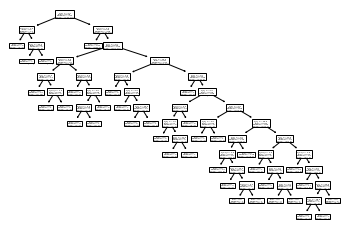

In [161]:
tree.plot_tree(clf)

#render Graph

In [162]:
!pip install graphviz

In [0]:
import graphviz                                                                          

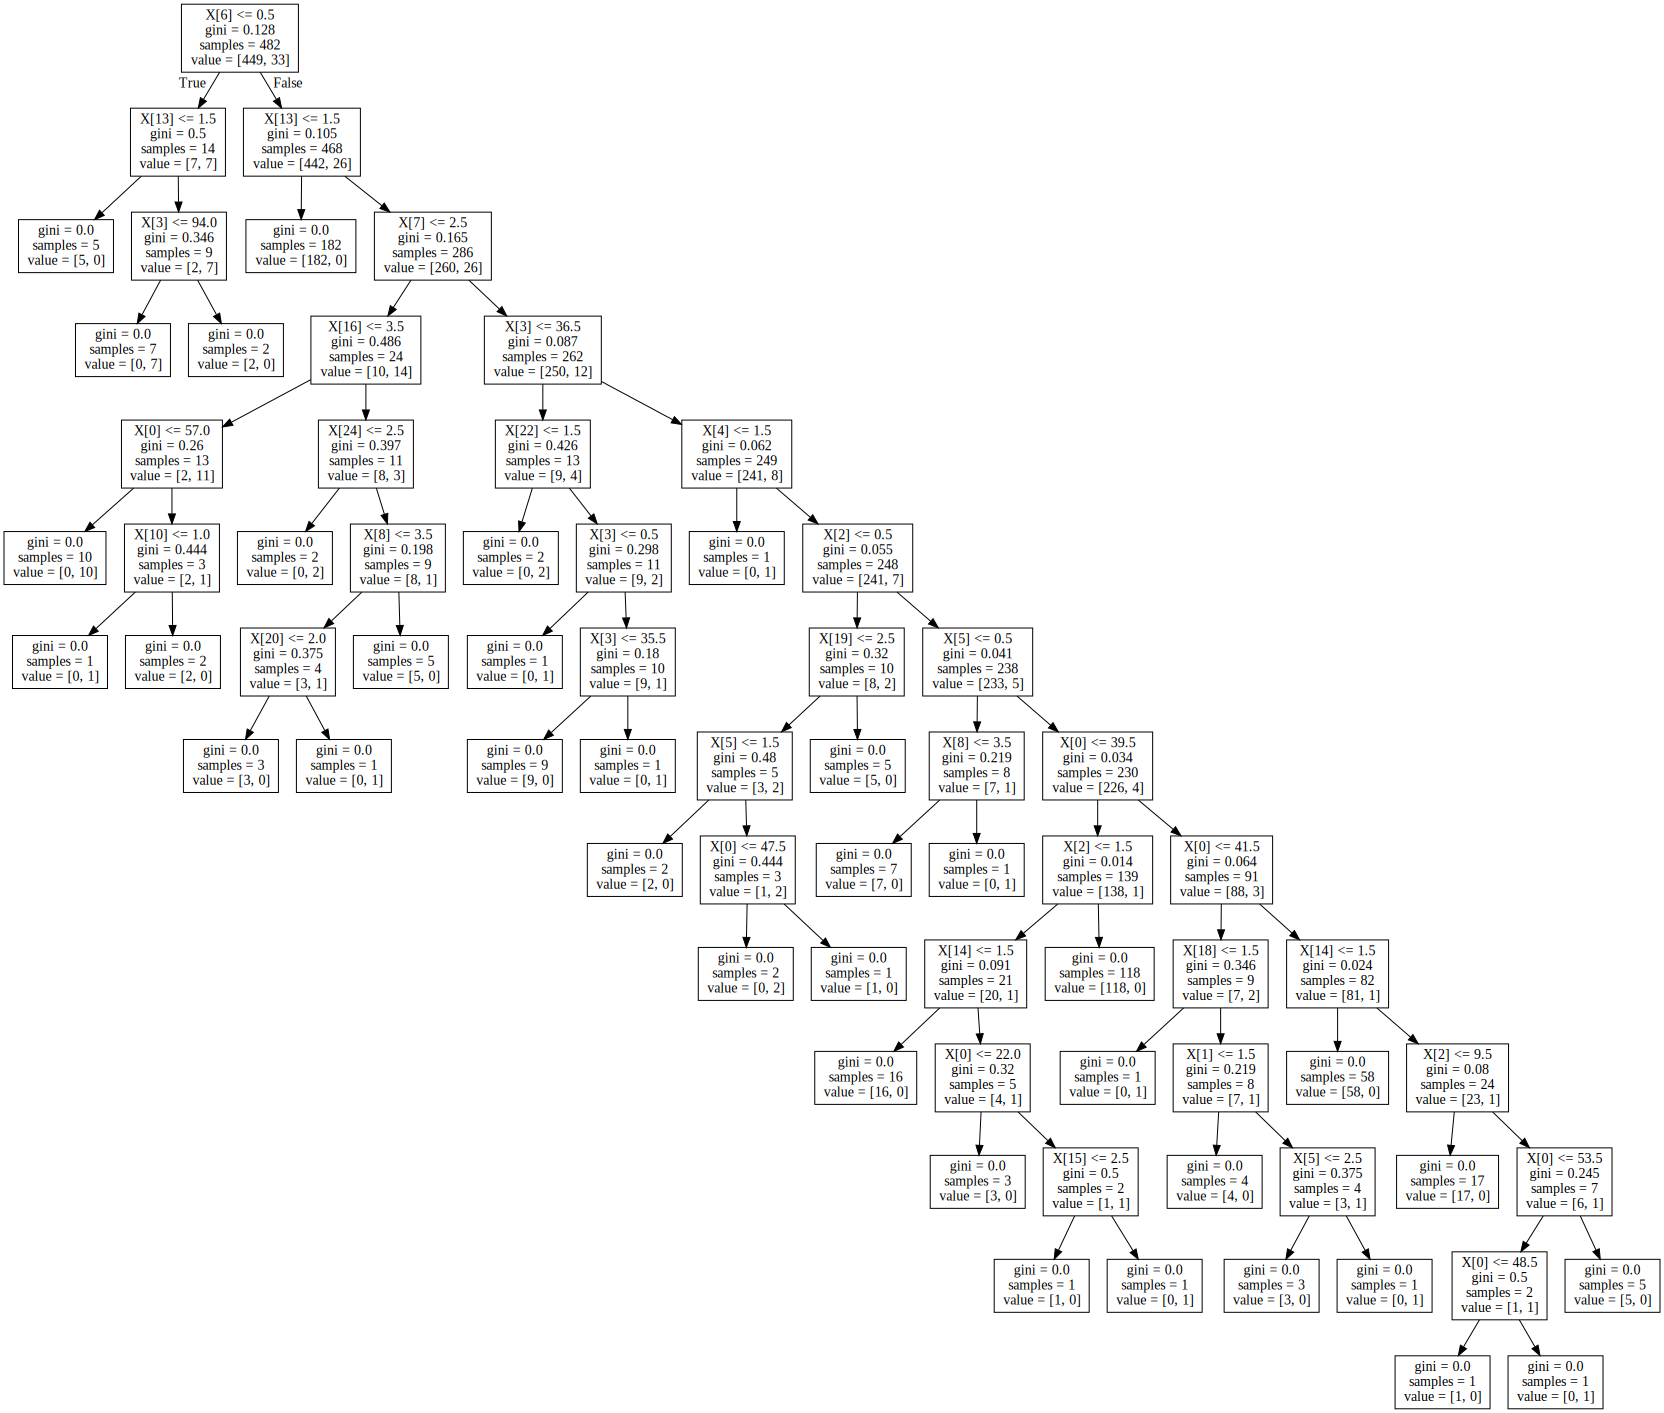

In [164]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render(medicine)
graph

#

In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text


In [166]:
r = export_text(clf)
r

'|--- feature_6 <= 0.50\n|   |--- feature_13 <= 1.50\n|   |   |--- class: False\n|   |--- feature_13 >  1.50\n|   |   |--- feature_3 <= 94.00\n|   |   |   |--- class: True\n|   |   |--- feature_3 >  94.00\n|   |   |   |--- class: False\n|--- feature_6 >  0.50\n|   |--- feature_13 <= 1.50\n|   |   |--- class: False\n|   |--- feature_13 >  1.50\n|   |   |--- feature_7 <= 2.50\n|   |   |   |--- feature_16 <= 3.50\n|   |   |   |   |--- feature_0 <= 57.00\n|   |   |   |   |   |--- class: True\n|   |   |   |   |--- feature_0 >  57.00\n|   |   |   |   |   |--- feature_10 <= 1.00\n|   |   |   |   |   |   |--- class: True\n|   |   |   |   |   |--- feature_10 >  1.00\n|   |   |   |   |   |   |--- class: False\n|   |   |   |--- feature_16 >  3.50\n|   |   |   |   |--- feature_24 <= 2.50\n|   |   |   |   |   |--- class: True\n|   |   |   |   |--- feature_24 >  2.50\n|   |   |   |   |   |--- feature_8 <= 3.50\n|   |   |   |   |   |   |--- feature_20 <= 2.00\n|   |   |   |   |   |   |   |--- class: 

In [167]:
clf.score(X_test,Y_test)

0.9338842975206612

In [168]:
clf.score(traininput,trainAnswer)

0.9867330016583747

#SVM

In [0]:
from sklearn.svm import SVC

In [170]:
modelSVM = SVC()
modelSVM.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [171]:
modelSVM.score(X_test,Y_test)

0.9173553719008265

#save model

In [0]:
import pickle

In [0]:
filename = '/content/drive/My Drive/ThaiWordcutTest/DecisionTree_Model/'+medicine+'_decisionTree.sav'

In [0]:
pickle.dump(clf, open(filename, 'wb'))